# The Linear Regression

## Listing 11-1. Importing the data and plotting it

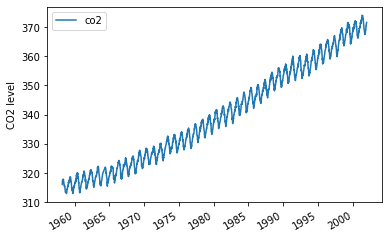

None

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

data = sm.datasets.co2.load_pandas()
co2 = data.data
co2 = co2.dropna()
ax = co2.plot()
ax.set_ylabel('CO2 level')
plt.rcParams['figure.figsize'] = [20, 10]
display(plt.show())


![](https://drive.google.com/uc?id=1ywrWllnwsYXc3mnmcN-CZ97uawU8JLWx)

In [2]:
co2['time'] = [x for x in co2.index]

C:\Users\Natanael\AppData\Local\Temp\ipykernel_5760\332268947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['time'] = [x for x in co2.index]


In [3]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2225 entries, 1958-03-29 to 2001-12-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   co2     2225 non-null   float64       
 1   time    2225 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.1 KB


In [4]:
co2.index.factorize()[0].reshape(-1,1)

array([[   0],
       [   1],
       [   2],
       ...,
       [2222],
       [2223],
       [2224]], dtype=int64)

0.9623230746280294 0.3843242263937173


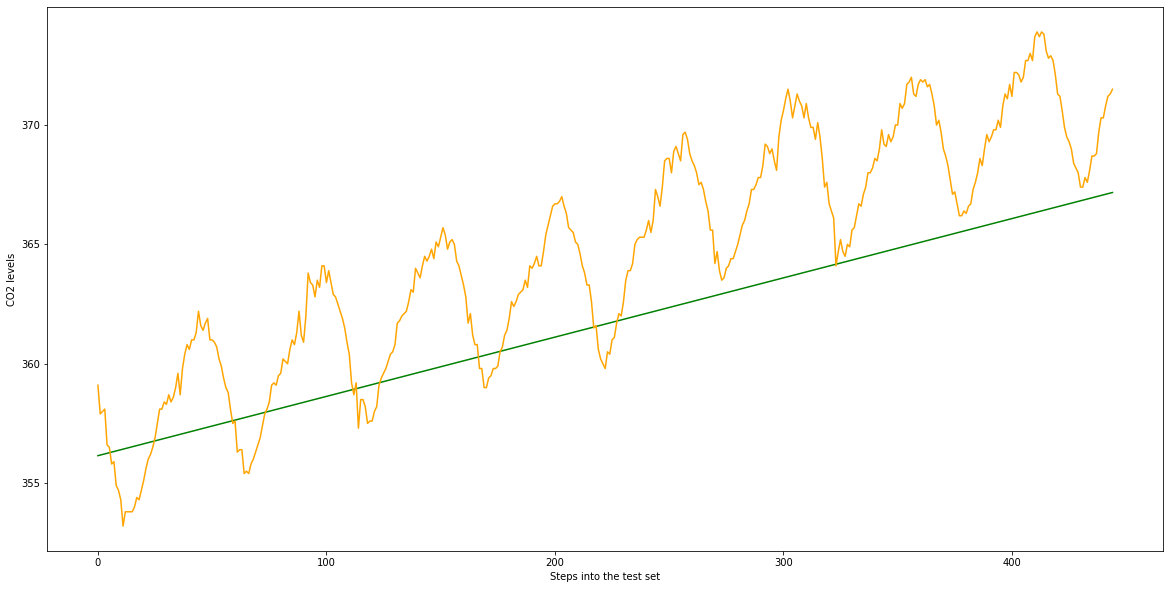

In [5]:
# Create X and y objects
X = co2.index.factorize()[0].reshape(-1,1)
y = co2['co2']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst), 'green')
plt.plot(list(y_test), 'orange')
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()


## Listing 11-2. Creating the variable month

In [6]:
co2['month'] = [x.month for x in co2.index] 

C:\Users\Natanael\AppData\Local\Temp\ipykernel_5760\27764350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['month'] = [x.month for x in co2.index]


## Listing 11-3. Creating the variable year

In [7]:
co2['year'] = [x.year for x in co2.index] 

C:\Users\Natanael\AppData\Local\Temp\ipykernel_5760\3206968955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['year'] = [x.year for x in co2.index]


## Listing 11-4. Fitting a Linear Regression with two variables

0.9690528910892225 0.3433251233951542


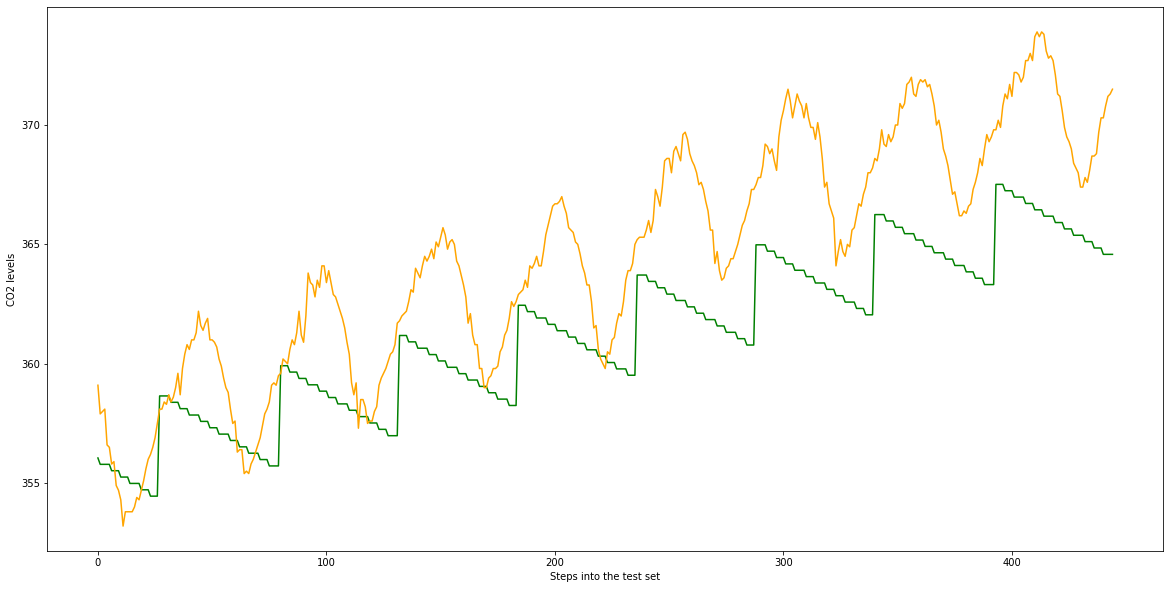

In [8]:
# Create X and y objects
X = co2[['year', 'month']]
y = co2['co2']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst), 'green')
plt.plot(list(y_test), 'orange')
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()


## Listing 11-4. Adding lagged variables into the data

In [9]:
co2['co2_l1'] = co2['co2'].shift(1)
co2['co2_l2'] = co2['co2'].shift(2)
co2['co2_l3'] = co2['co2'].shift(3)
co2['co2_l4'] = co2['co2'].shift(4)
co2['co2_l5'] = co2['co2'].shift(5)


C:\Users\Natanael\AppData\Local\Temp\ipykernel_5760\3081521428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l1'] = co2['co2'].shift(1)
C:\Users\Natanael\AppData\Local\Temp\ipykernel_5760\3081521428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l2'] = co2['co2'].shift(2)
C:\Users\Natanael\AppData\Local\Temp\ipykernel_5760\3081521428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [10]:
co2.head(10)

,co2,time,month,year,co2_l1,co2_l2,co2_l3,co2_l4,co2_l5
1958-03-29,316.1,1958-03-29,3,1958,NaN,NaN,NaN,NaN,NaN
1958-04-05,317.3,1958-04-05,4,1958,316.1,NaN,NaN,NaN,NaN
1958-04-12,317.6,1958-04-12,4,1958,317.3,316.1,NaN,NaN,NaN
1958-04-19,317.5,1958-04-19,4,1958,317.6,317.3,316.1,NaN,NaN
1958-04-26,316.4,1958-04-26,4,1958,317.5,317.6,317.3,316.1,NaN
1958-05-03,316.9,1958-05-03,5,1958,316.4,317.5,317.6,317.3,316.1
1958-05-17,317.5,1958-05-17,5,1958,316.9,316.4,317.5,317.6,317.3
1958-05-24,317.9,1958-05-24,5,1958,317.5,316.9,316.4,317.5,317.6
1958-07-05,315.8,1958-07-05,7,1958,317.9,317.5,316.9,316.4,317.5
1958-07-12,315.8,1958-07-12,7,1958,315.8,317.9,317.5,316.9,316.4


## Listing 11-5. Drop missing values

In [11]:
co2 = co2.dropna()

## Listing 11-6. Fitting the full Linear Regression model

0.998797756425323 0.9904370120462797


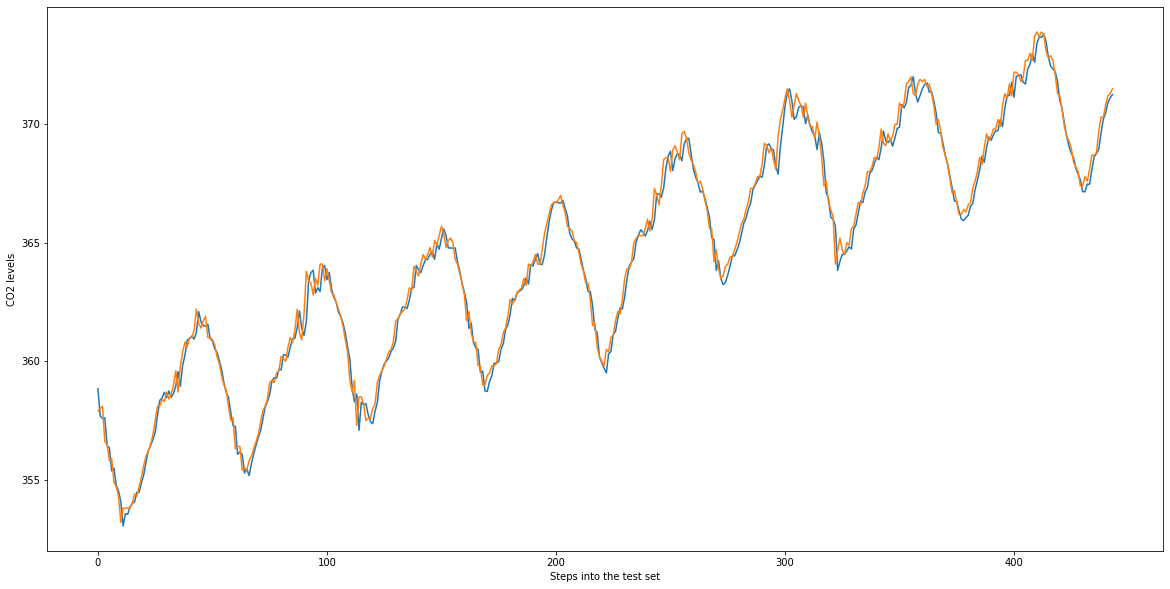

In [12]:
# Create X and y objects
X = co2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = co2['co2']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()
